Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

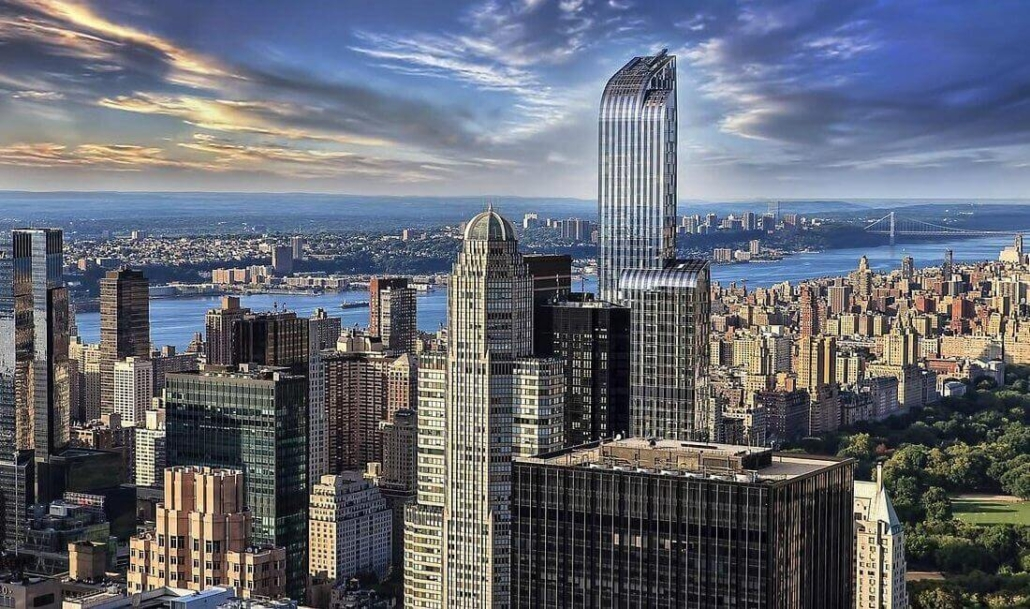

One of the world's most visited cities is New York City (NYC). Because of this, there are a lot of Airbnb listings to satisfy the enormous demand for short-term housing that can last anywhere from a few nights to many months. Using the data from the file type.csv, we will examine the NYC Airbnb market in this notebook.

**Our goals are to convert untidy data into appropriate formats to analyze, and answer key questions including:**

*   Which type of room does the people prefer?
*   Which neighborhoods has the highest number of rated hotels?
*   What is the average price for the private rooms?
*   What are the cheapest hotels in Airbnb?
*   What are the highest rated hotels?


---


**This project is for ▶**

1.   Learning Data Cleaning
2.   Handling missing values
3.   Data Visualization

---
**Airbnb_Open_Data.csv** ▶

*  id : Airbnb's unique identifier for the listing
*  NAME : Name of the listing
*  host id : Airbnb's unique identifier for the host
*  host name : Name of the host. Usually just the first name(s)
*  room type : Name of the room
















In [380]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Prepration

data importing

In [381]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb_Open_Data.csv')


<ipython-input-381-577530a4ccd2>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Airbnb_Open_Data.csv')


Data Discovery

In [382]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [383]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [384]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [385]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


Data Cleaning

In [386]:
columns_to_drop = ['host id', 'country', 'country code','country code','lat','long']
df = df.drop(columns_to_drop, axis=1)
df.head(5)

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [387]:
# For columns with numerical data, we can consider filling missing values with the median or mean
numerical_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-387-779f8c68b23b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [388]:
# For categorical columns, we can consider filling missing values with the mode
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy',
                       'room type', 'house_rules']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-388-d1ead0bb8059>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-388-d1ead0bb8059>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


In [389]:
# Removing rows with missing 'price'
df = df.dropna(subset=['price'])

In [390]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
NAME,247
host_identity_verified,0
host name,401
neighbourhood group,0
neighbourhood,0
instant_bookable,0
cancellation_policy,0
room type,0
Construction year,0


In [391]:
df.columns

Index(['id', 'NAME', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

In [392]:
len(df)

102352

In [393]:
df=df.drop_duplicates()

In [394]:
len(df)

101811

In [395]:
df=df.fillna(0)

In [396]:
df.head(5)

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,...,$124,3.0,0.0,0,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,#NAME?,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0


In [397]:
df['price']

,price
0,$966
1,$142
2,$620
3,$368
4,$204
...,...
102053,$696
102054,$909
102055,$387
102056,$848


In [398]:
replace_dict = {'\$': '', ',': ''}
df['price'] = df['price'].replace(replace_dict, regex=True)
df['service fee'] = df['service fee'].replace(replace_dict, regex=True)
df.head()

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,...,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,...,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,...,124,3.0,0.0,0,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,...,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,#NAME?,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,...,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0


In [399]:
df['price']

,price
0,966
1,142
2,620
3,368
4,204
...,...
102053,696
102054,909
102055,387
102056,848


In [400]:
df['price'] = pd.to_numeric(df['price'])#change price from object to numeric

# Exploring The Dataset

In [401]:
room_type_counts = df['room type'].value_counts()
print(room_type_counts)

room type
Entire home/apt    53296
Private room       46200
Shared room         2200
Hotel room           115
Name: count, dtype: int64


In [402]:
cancellation_counts = df['cancellation_policy'].value_counts()
print(cancellation_counts)

cancellation_policy
moderate    34156
strict      33847
flexible    33808
Name: count, dtype: int64


In [403]:
top_15_names_highest_rated = df.nlargest(15, 'review rate number')['NAME']
print(top_15_names_highest_rated)

2                 THE VILLAGE OF HARLEM....NEW YORK !
6                                     BlissArtsSpace!
7                                     BlissArtsSpace!
9                  Cozy Clean Guest Room - Family Apt
17                  Perfect for Your Parents + Garden
19    Hip Historic Brownstone Apartment with Backyard
26                 Sunny Bedroom Across Prospect Park
40                LowerEastSide apt share shortterm 1
54                     Greenpoint Place...Has It All!
55                Beautiful Apartment in Manhattan!!!
56                   Williamsburg 1 bedroom Apartment
60                                                  0
63                                                  0
89                             Great Location for NYC
90                  Cozy Bedroom in Williamsburg 3 BR
Name: NAME, dtype: object


In [404]:
highest_rating = df['review rate number'].max()
highest_rating_name= df.nlargest(1, 'review rate number')['NAME']
print("The highest rating is:", highest_rating,"and the name is : ",highest_rating_name)

The highest rating is: 5.0 and the name is :  2    THE VILLAGE OF HARLEM....NEW YORK !
Name: NAME, dtype: object


Top Rated Hotels (Rating = 5)

In [405]:
highest_rating = df['review rate number'].max()
Top_rated_hotels = df[df['review rate number'] == highest_rating]['NAME'].drop_duplicates()
print(Top_rated_hotels)
num_top_rated_hotels = len(Top_rated_hotels)
print("\nNumber of top-rated hotels:", num_top_rated_hotels)

2                    THE VILLAGE OF HARLEM....NEW YORK !
6                                        BlissArtsSpace!
9                     Cozy Clean Guest Room - Family Apt
17                     Perfect for Your Parents + Garden
19       Hip Historic Brownstone Apartment with Backyard
                              ...                       
99180                                    Bronx Apartment
99195                         Cozy room by South Seaport
99573                             Cozy 1bd in Kensington
99578                     Elmhurst 1st Fl Rightl Bedroom
99587      Parisian Style Apartment in Heart of Brooklyn
Name: NAME, Length: 15451, dtype: object

Number of top-rated hotels: 15451


Top Hotels in the average rating (Rating = 3,4)

In [406]:
filtered_hotels = df[(df['review rate number'] >= 3) & (df['review rate number'] <= 4)]

hotel_names = filtered_hotels['NAME'].drop_duplicates()
print(hotel_names)
num_average_hotels = filtered_hotels['NAME'].nunique() #method returns the number of unique values for each column
print("\nNumber of hotels with a average rating:", num_average_hotels)

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
3                                                        0
4         Entire Apt: Spacious Studio/Loft by central park
5                Large Cozy 1 BR Apartment In Midtown East
                               ...                        
99683    Spacious and Homey 2 bedroom, Express Subway Stop
99685    Luxury meets comfort in the heart of Williamsb...
99686    Private room in Williamsburg. Very close to tr...
99688                                          Cloud Suite
99689                   Large modern one bedroom apartment
Name: NAME, Length: 30130, dtype: object

Number of hotels with a average rating: 30130


 Hotels with Low rating (Rating = 1,2)



In [407]:
low_rated_hotels = df[(df['review rate number'] >= 1) & (df['review rate number'] <= 2)]

hotels = low_rated_hotels['NAME'].drop_duplicates()
print(hotels)
num_low_hotels = low_rated_hotels['NAME'].nunique()
print("\nNumber of hotels with low rating", num_low_hotels)

42                     Beautiful Sunny Park Slope Brooklyn
43                       1bdr w private bath. in lofty apt
49                               bright and stylish duplex
50                                  Fort Greene brownstone
51         Blue Room for 2 in Brownstone for $1350 monthly
                               ...                        
94343    Modern Super Clean Midtown Apt in the Heart of...
99179    Beautiful Brooklyn Brownstone Entire Parlor Fl...
99191             Pretty and cozy 2BR apartment in Chelsea
99192    Beautiful Duplex & Private Terrace in Williams...
99194                                      A place to stay
Name: NAME, Length: 20154, dtype: object

Number of hotels with low rating 20154


Check if there is any Hotel Unrated

In [408]:
unrated_hotels = df[df['review rate number'].isnull()]
unrated_hotels['review rate number'] = 0

hotels_unrated = unrated_hotels['NAME'].drop_duplicates()
print(hotels_unrated)
num_unrated_hotels = unrated_hotels['NAME'].nunique()
print("\nNumber of hotels with zero rating:", num_unrated_hotels)

Series([], Name: NAME, dtype: object)

Number of hotels with zero rating: 0


Top 10 Expensive Hotels

In [409]:
top_10_expensive_hotels = df.nlargest(10, 'price')['NAME']
print("Top 10 most expensive hotels:","\n",top_10_expensive_hotels)

Top 10 most expensive hotels: 
 2589                     Beautiful Central Harlem sleeps 4
5207         Bushwick Room w/ Private Entrance & Bathroom!
7453     Sun-filled bedroom in East Village / Gramercy NYC
9805                   Private room in hip & historic area
10204                   1BR GARDEN APT 25 MIN TO MANHATTAN
12575                     Cozy room in Chic Apt Astoria NY
16277               Luxurious SOHO 2 BR Washington Sq Park
16835                                Ideal Bushwick Rental
17080             West 50th Street, Luxury Svcd Studio Apt
18785     An Urban Oasis in the Heart of Downtown Brooklyn
Name: NAME, dtype: object


Top 10 Cheapest Hotels

In [410]:
top_10_cheapest_hotels = df.nsmallest(10, 'price')['NAME']
print("\nTop 10 cheapest hotels:")
print(top_10_cheapest_hotels)


Top 10 cheapest hotels:
360                   MANHATTAN Neat, Nice, Bright ROOM
959                 Great apt on the UWS - A RARE FIND!
1658        Big, close to subway, 3 stops from the city
2461                 Stuyvesant Heights Apt mins 2 City
3047                  Effortlessly Chic WILLIAMSBURG BK
3780                                 Super Bowl Weekend
4674                   Private room in Williamsburg apt
5110    Cozy Vintage Artist Flat(Williamsburg/Bushwick)
8495                   Private Room in Williamsburg Apt
8913                 Room in Williamsburg opposite park
Name: NAME, dtype: object


Top 10 Expensive Neighborhoods

In [411]:
neighborhood_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

top_10_expensive_neighborhoods = neighborhood_prices.head(10)
print("\nTop 10 most expensive neighborhoods:")
print(top_10_expensive_neighborhoods)


Top 10 most expensive neighborhoods:
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Shore Acres                805.142857
Arden Heights              804.888889
Midland Beach              796.176471
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


Top 10 Cheapest Neighborhoods



In [412]:
top_10_cheapest_neighborhoods = neighborhood_prices.tail(10)
print("\nTop 10 cheapest neighborhoods:")
print(top_10_cheapest_neighborhoods)


Top 10 cheapest neighborhoods:
neighbourhood
Randall Manor                 472.400000
West Farms                    463.166667
Emerson Hill                  443.800000
Bay Terrace, Staten Island    429.500000
Castleton Corners             417.230769
Richmondtown                  373.400000
Breezy Point                  309.888889
Rossville                     300.666667
Spuyten Duyvil                293.444444
Lighthouse Hill               107.666667
Name: price, dtype: float64


Oldest Hotels

In [413]:
oldest_hotels = df[df['Construction year'].notnull()]
oldest_hotels = oldest_hotels.sort_values('Construction year').head(10)['NAME']
print('Oldest Hotels in NYC:', oldest_hotels)

Oldest Hotels in NYC: 45544    Steps away from Columbia University/ Morningsi...
9548                Charming Classic UWS Bedroom & Balcony
26138    Homey Midtown East 1BR w/ Gym, Doorman, near t...
18552                              California Vibes in NYC
38273    Lovely private room with private bath in Brooklyn
18545                    Large bedroom in Harlem available
74285          Nolita (SoHo) - Lovely, brand new apartment
18534                                        Lovely studio
44001                                      MONTAUK HEIGHTS
88316     Sunny 1BR near Central Park, Columbia University
Name: NAME, dtype: object


Newest Hotels

In [414]:
newest_hotels = df[df['Construction year'].notnull()]
newest_hotels = newest_hotels.sort_values('Construction year', ascending=False).head(10)['NAME']
print('Newest Hotels in NYC:', newest_hotels)

Newest Hotels in NYC: 51042                Simple & Clean room for quick getaway
57821                                     Garden Apartment
57468                     Beautiful apartment in Manhattan
7398                                       Brooklyn Luxury
57562    "ONE FULL SIZE BED THAT HOLDS \n  A FAMILY OF ...
57583                             Monthly Apartment Rental
57597      Private Studio Apartment in Heart of Brooklyn!!
57626                          Sun-drenched Brooklyn Haven
57681    Lovely 3-bed rental with FREE PARKING on premises
7367                   New York City Dreaming - Upper West
Name: NAME, dtype: object


# Data Visuallization

Type Of The Room Distribution

> means that people prefer the entire home or a private room







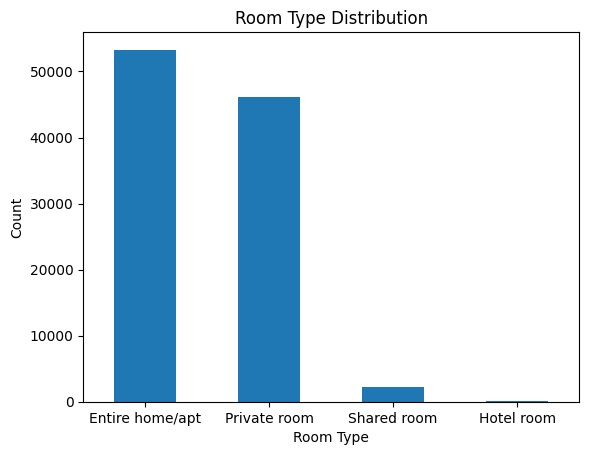

In [415]:
room_type_counts = df['room type'].value_counts()
room_type_counts.plot(kind='bar')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Bedford-Stuyvesant and Williamsburg are the neighborhoods with the highest number of rated hotels

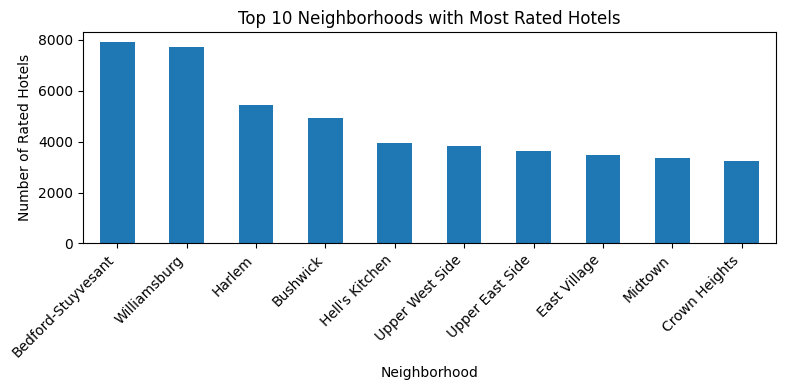

In [416]:
neighborhood_counts = df[df['review rate number'].notnull()].groupby('neighbourhood')['NAME'].count().sort_values(ascending=False)
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(8, 4))
top_neighborhoods.plot(kind='bar')
plt.title('Top 10 Neighborhoods with Most Rated Hotels')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Rated Hotels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The lowest rated hotels are the most

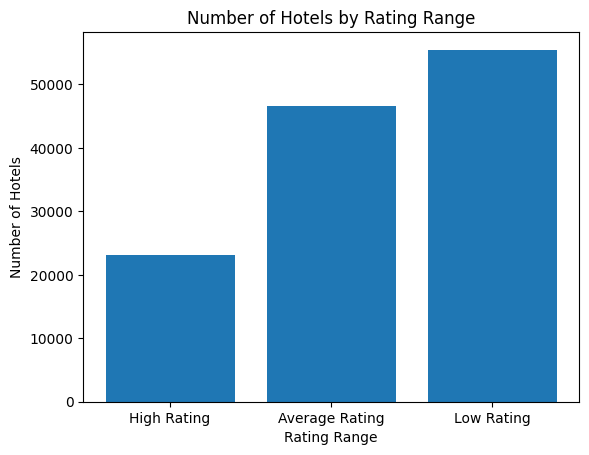

In [417]:
high_rating_range = (4.5, 5.0)
average_rating_range = (3.0, 4.5)
low_rating_range = (0.0, 3.0)

high_rated_hotels = df[df['review rate number'].between(*high_rating_range)]
average_rated_hotels = df[df['review rate number'].between(*average_rating_range)]
low_rated_hotels = df[df['review rate number'].between(*low_rating_range)]

hotel_counts = {
    "High Rating": len(high_rated_hotels),
    "Average Rating": len(average_rated_hotels),
    "Low Rating": len(low_rated_hotels),
}

plt.bar(hotel_counts.keys(), hotel_counts.values())

plt.title("Number of Hotels by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Hotels")

plt.show()

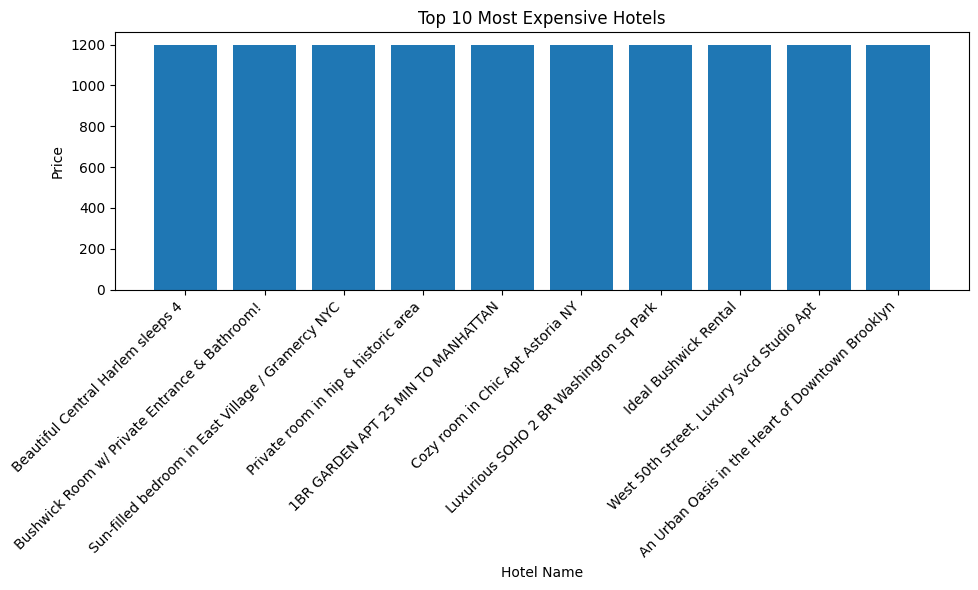

In [418]:
top_10_expensive_hotels_df = df.nlargest(10, 'price')
hotels = top_10_expensive_hotels_df['NAME'].to_list()
prices = top_10_expensive_hotels_df['price'].to_list()

plt.figure(figsize=(10, 6))
plt.bar(hotels, prices)

plt.title("Top 10 Most Expensive Hotels")
plt.xlabel("Hotel Name")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

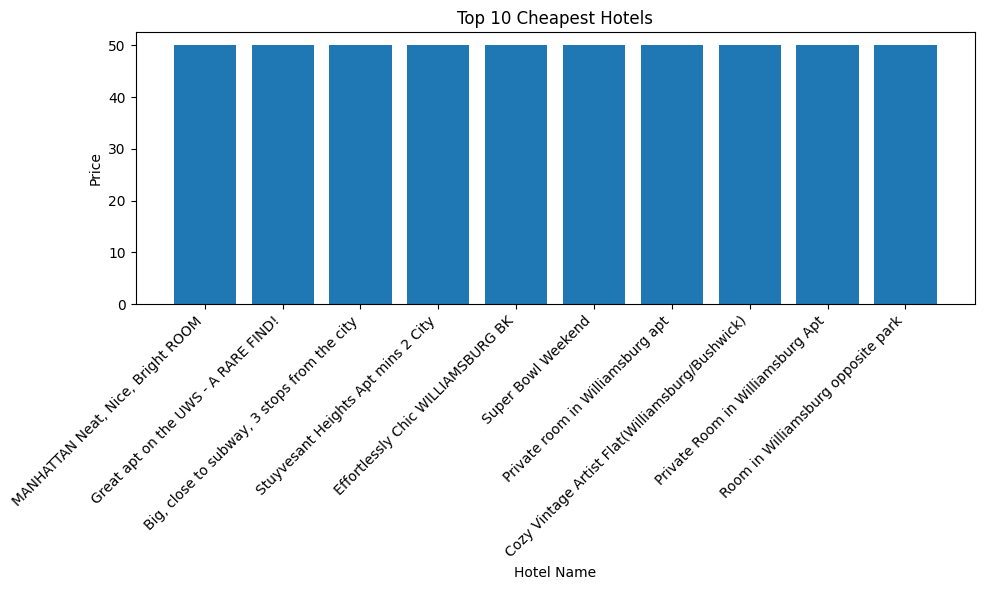

In [430]:
top_10_cheapest_hotels_df = df.nsmallest(10, 'price')
hotels = top_10_cheapest_hotels_df ['NAME'].to_list()
prices = top_10_cheapest_hotels_df ['price'].to_list()

plt.figure(figsize=(10, 6))
plt.bar(hotels, prices)

plt.title("Top 10 Cheapest Hotels")
plt.xlabel("Hotel Name")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

New Drop is the most expensive neighborhood

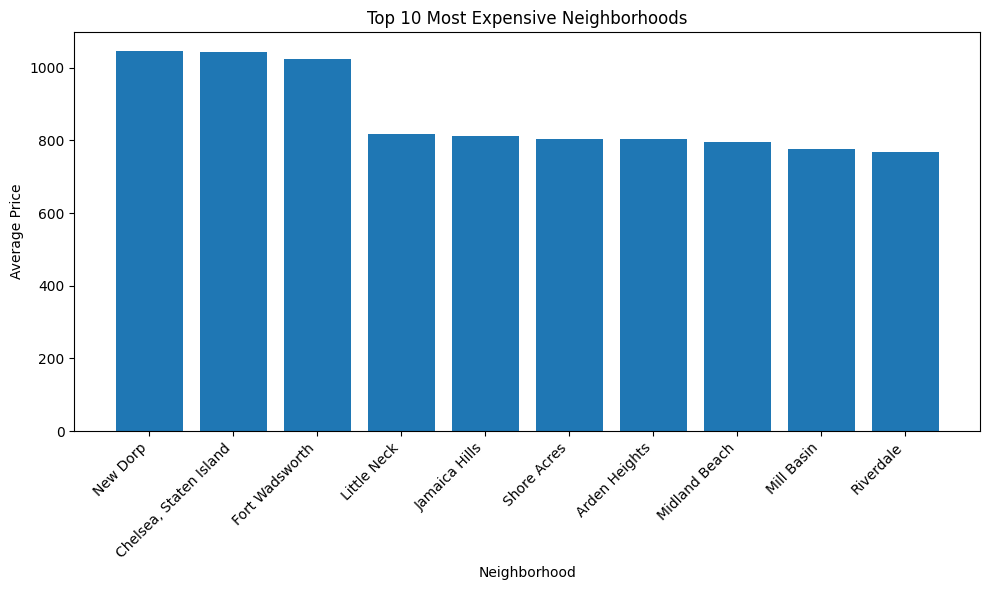

In [419]:
top_10_expensive_neighborhoods = neighborhood_prices.head(10)
neighborhoods = top_10_expensive_neighborhoods.index.to_list()
average_prices = top_10_expensive_neighborhoods.to_list()

plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, average_prices)

plt.title("Top 10 Most Expensive Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Lighthouse Hill is the cheapest neighborhood



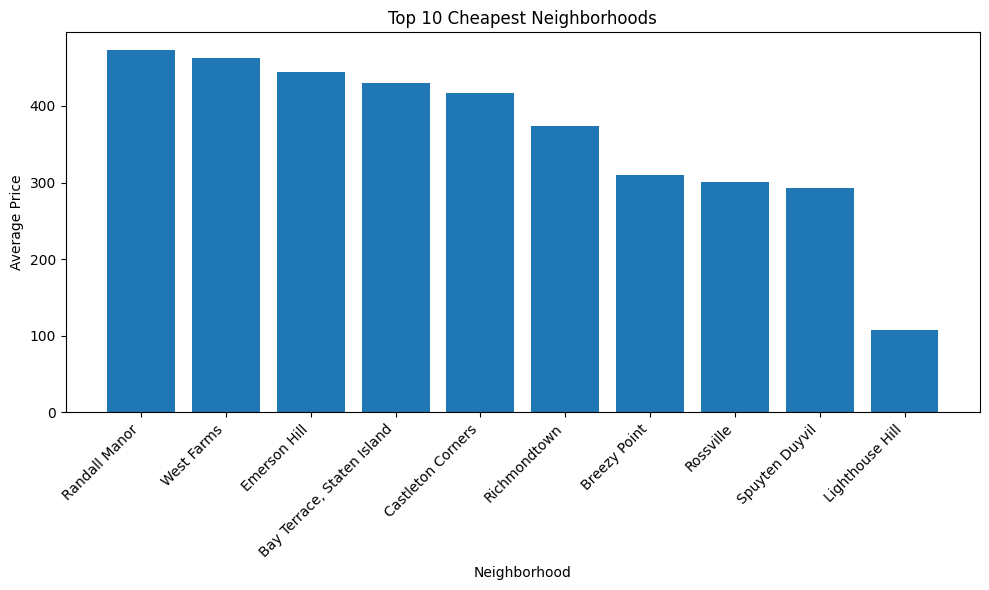

In [420]:
top_10_cheapest_neighborhoods = neighborhood_prices.tail(10)
neighborhoods = top_10_cheapest_neighborhoods.index.to_list()
average_prices = top_10_cheapest_neighborhoods.to_list()

plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, average_prices)

plt.title("Top 10 Cheapest Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Prices Based on the Room Type

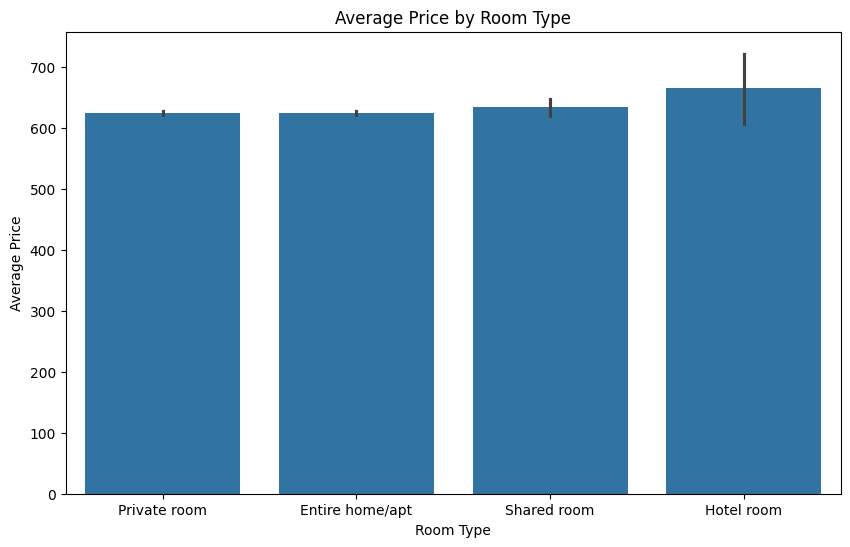

In [421]:
# Room Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

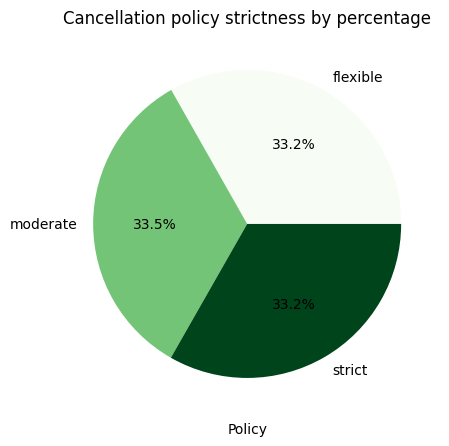

In [422]:
fig, ax = plt.subplots(figsize=(10, 5))
policy = df.groupby('cancellation_policy')['id'].count().plot(
    kind='pie', autopct='%1.1f%%', colormap='Greens'
).set(title='Cancellation policy strictness by percentage', xlabel='Policy', ylabel=None)
plt.show()

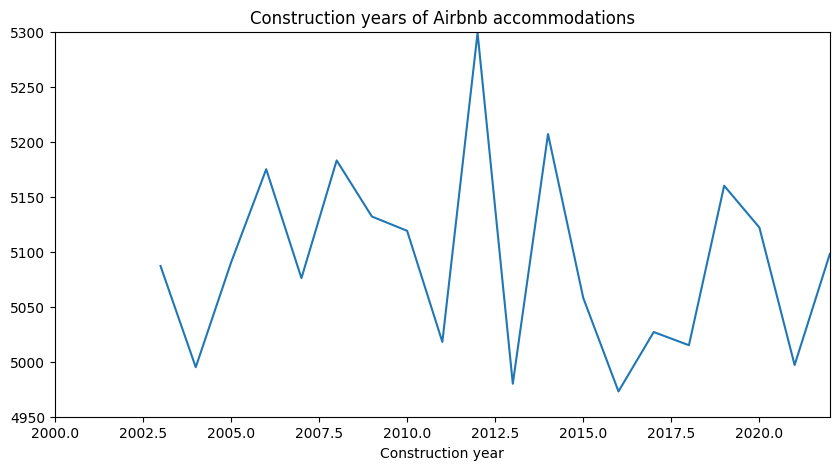

In [423]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('Construction year')['id'].count().plot(kind='line')
ax.set(title='Construction years of Airbnb accommodations', xlabel='Construction year')
ax.set_xlim(2000, 2022)
ax.set_ylim(4950, 5300)
plt.show()

# Data preprocessing

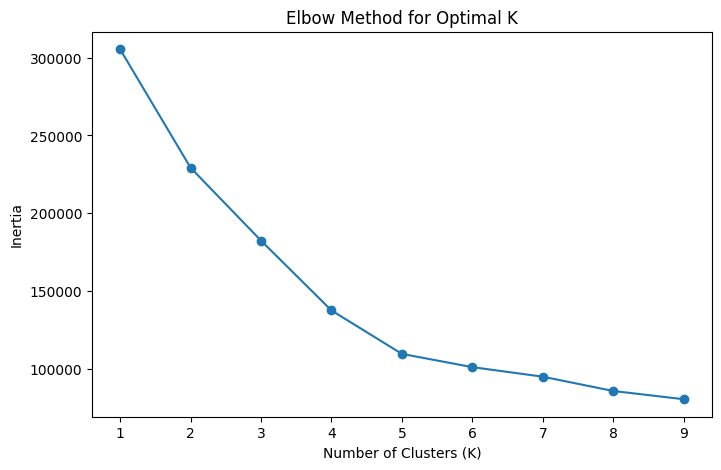

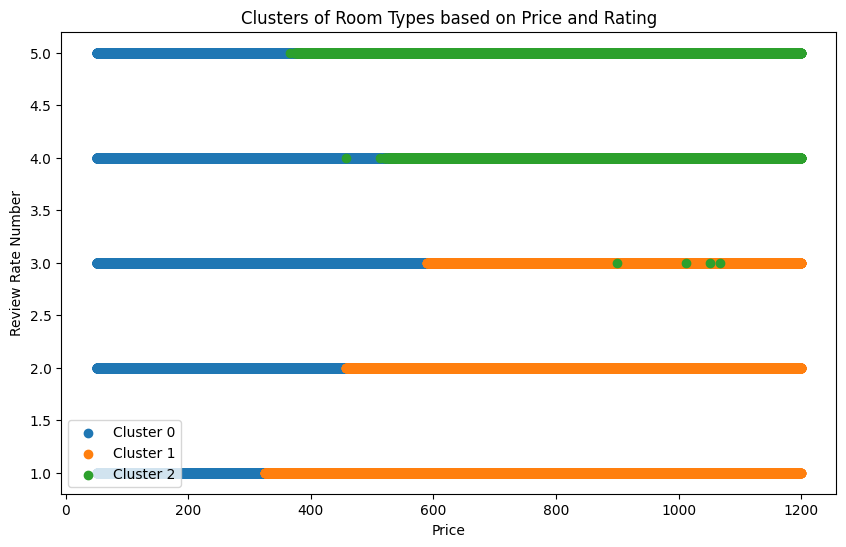

              price  reviews per month  review rate number        room type
Cluster                                                                    
0        274.445043           1.286165            3.275351  Entire home/apt
1        842.942499           1.219785            2.158480  Entire home/apt
2        821.531497           1.332936            4.552796  Entire home/apt


In [424]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Data Preparation
features = ['price', 'reviews per month', 'review rate number']
data = df[features].copy()

data.dropna(inplace=True)

#Scaling the Data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#Finding Optimal Clusters Using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters
df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['price'], cluster_data['review rate number'], label=f'Cluster {cluster_label}')

plt.title('Clusters of Room Types based on Price and Rating')
plt.xlabel('Price')
plt.ylabel('Review Rate Number')
plt.legend()
plt.show()

cluster_analysis = df.groupby('Cluster').agg({
    'price': 'mean',
    'reviews per month': 'mean',
    'review rate number': 'mean',
    'room type': lambda x: x.value_counts().index[0]
})
print(cluster_analysis)

# Building The Model

In [425]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['reviews per month', 'review rate number', 'price']]
y = df['room type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.73
                 precision    recall  f1-score   support

Entire home/apt       0.75      0.76      0.75      8036
     Hotel room       0.00      0.00      0.00        18
   Private room       0.72      0.71      0.71      6898
    Shared room       0.45      0.45      0.45       320

       accuracy                           0.73     15272
      macro avg       0.48      0.48      0.48     15272
   weighted avg       0.73      0.73      0.73     15272

